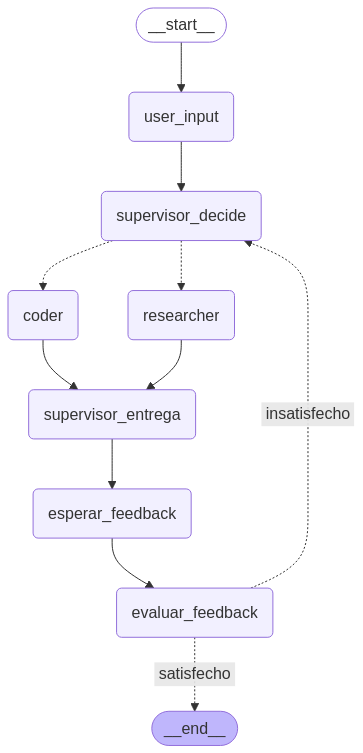

In [6]:
from langgraph.graph import StateGraph, END, START
from langchain_core.messages import HumanMessage
from langchain_core.runnables import RunnableLambda
from IPython.display import display, Image

# Estado mínimo
class GlobalState(dict):
    pass

# Nodos vacíos
def placeholder_node(state):
    pass

# Condicional simple (retorna una rama arbitraria para visualizar)
def decidir_agente(state):
    return "coder"  # Podrías cambiarlo a "researcher" si quieres probar otra rama

# Condicional para feedback (simulado)
def evaluar_satisfaccion(state):
    return "satisfecho"  # o "insatisfecho"

# Wrappers como Runnables
user_input = RunnableLambda(placeholder_node)
supervisor_entrega = RunnableLambda(placeholder_node)
esperar_feedback = RunnableLambda(placeholder_node)

supervisor_decide = RunnableLambda(decidir_agente)
agent_coder = RunnableLambda(placeholder_node)
agent_researcher = RunnableLambda(placeholder_node)
evaluar_feedback = RunnableLambda(evaluar_satisfaccion)

# Crear grafo
graph = StateGraph(GlobalState)

# Nodos
graph.add_node("user_input", user_input)
graph.add_node("supervisor_decide", supervisor_decide)
graph.add_node("coder", agent_coder)
graph.add_node("researcher", agent_researcher)
graph.add_node("supervisor_entrega", supervisor_entrega)
graph.add_node("esperar_feedback", esperar_feedback)
graph.add_node("evaluar_feedback", evaluar_feedback)

# Flujo
graph.add_edge(START, "user_input")
graph.add_edge("user_input", "supervisor_decide")
# Primera condición: supervisor decide qué agente usar
graph.add_conditional_edges(
    "supervisor_decide",           # Nodo
    decidir_agente,                # Función condicional
    {                              # Mapeo de salidas
        "coder": "coder",
        "researcher": "researcher"
    }
)
graph.add_edge("coder", "supervisor_entrega")
graph.add_edge("researcher", "supervisor_entrega")
graph.add_edge("supervisor_entrega", "esperar_feedback")
graph.add_edge("esperar_feedback", "evaluar_feedback")


# Segunda condición: evaluar si el usuario está satisfecho
graph.add_conditional_edges(
    "evaluar_feedback",
    evaluar_satisfaccion,
    {
        "satisfecho": END,
        "insatisfecho": "supervisor_decide"
    }
)


# Compilar grafo
graph = graph.compile()
# Mostrar visualización del grafo
display(Image(graph.get_graph().draw_mermaid_png()))